#### Sentiment Analysis
Def: Determining whether a piece of writing/text is positive/negative/neutral. 
- help data analytics to gauge public opinion, monitor brand reputation, etc

Dataset: First GOP Debate Twitter Sentiment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv("Data/Sentiment.csv")

bar_plt = dataset.candidate.value_counts()
bar_plt.plot(kind='bar', title = 'Total Tweets for each Candidate', figsize=(14,6))

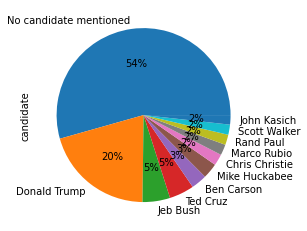

In [77]:
dataset.candidate.value_counts().plot(kind='pie', autopct='%1.0f%%')

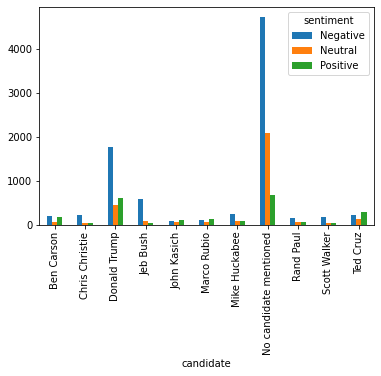

In [78]:
twitter_sentiment = dataset.groupby(['candidate','sentiment']).sentiment.count().unstack()
twitter_sentiment.plot(kind='bar')

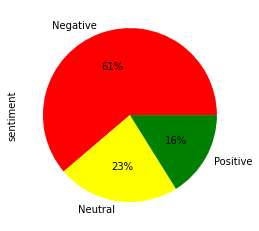

In [79]:
dataset.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [2]:
dataset = dataset.drop(dataset[dataset.sentiment == "Neutral"].index)
#sentiment_map = {"Positive" : 1, "Negative":0}
#dataset['sentiment'] = dataset['sentiment'].map(sentiment_map)
X = dataset["text"]
y = dataset["sentiment"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

from sklearn.feature_extraction.text import TfidfVectorizer
spam_fil = TfidfVectorizer(max_df=0.8,min_df=2,stop_words='english')
#spam_fil.fit(X_train) 
#print(spam_fil.get_feature_names())

X_train = spam_fil.fit_transform(X_train).toarray()
X_test = spam_fil.transform(X_test).toarray()
X_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
y

1        Positive
3        Positive
4        Positive
5        Positive
6        Negative
           ...   
13866    Negative
13867    Positive
13868    Positive
13869    Negative
13870    Positive
Name: sentiment, Length: 10729, dtype: object

In [4]:
#Using Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

pred_test_nb = nb_model.predict(X_test)
print(accuracy_score(y_test, pred_test_nb))

0.6492699596147872


In [5]:
#using K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
kneigh = KNeighborsClassifier(n_neighbors = 5)
kneigh.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix
pred_test = kneigh.predict(X_test)
print(accuracy_score(y_test, pred_test))


0.8241689965827896


In [84]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [85]:
predictions = text_classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[2445  104]
 [ 367  303]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2549
           1       0.74      0.45      0.56       670

    accuracy                           0.85      3219
   macro avg       0.81      0.71      0.74      3219
weighted avg       0.84      0.85      0.84      3219

0.8536812674743709


In [90]:
twt = ['All #GOP candidates want to reduce taxes while #Huckabee wants to legalize prostitution and drugs so we can tax it. #GOPDebate']
#vectorizing the tweet by the pre-fitted tokenizer instance
X_twt = spam_fil.transform(twt).toarray()
predictions = text_classifier.predict(X_twt)

In [91]:
predictions

array([0], dtype=int64)

In [6]:
#Saving tfidf model
import joblib
joblib.dump(spam_fil, "sentiment-trained-tfidf.pkl")


['sentiment-trained-tfidf.pkl']

In [8]:
#Saving Naive Bayes Model
import joblib
joblib.dump(nb_model, "sentiment-nb-model.pkl")

['sentiment-nb-model.pkl']

#### Wordcloud

In [7]:
from wordcloud import WordCloud,STOPWORDS

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
dataset = pd.read_csv("Data/Sentiment.csv")
data = dataset[['text','sentiment']]

# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]
 

Positive words


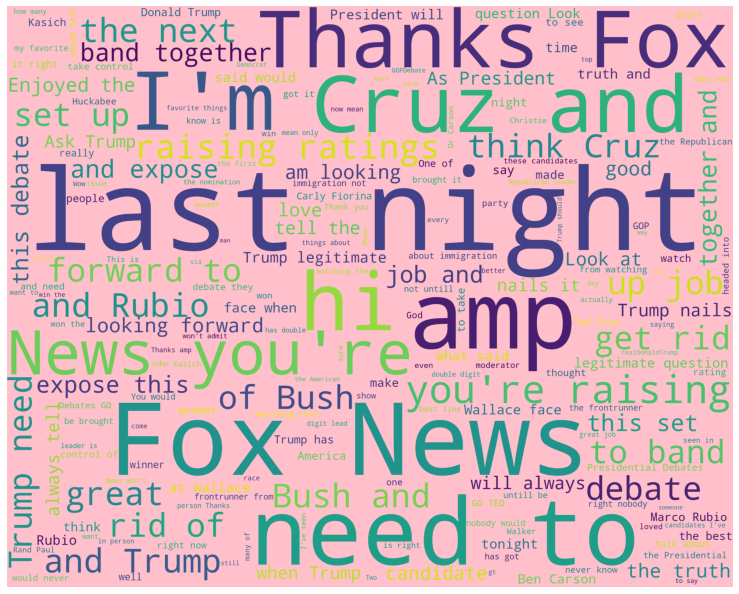

In [9]:
from nltk.corpus import stopwords


train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'pink')

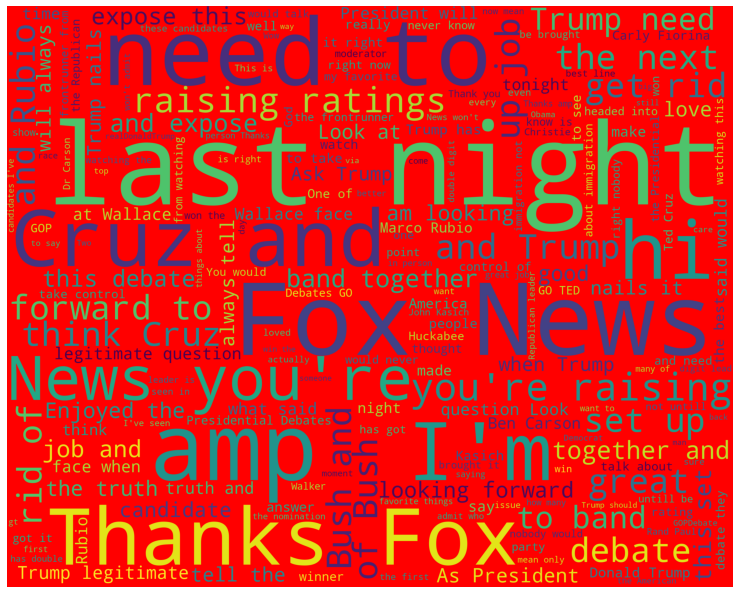

In [10]:
wordcloud_draw(train_pos,'red')

In [ ]:
wordcloud_draw(train_pos,'white')